# Importing Data 

In [41]:
import pandas as pd

#Displaying the dataset into a tablefor "train" and "test"
#Reading file type (csv) into data frame using pd.read_filetype("file")

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


# Viewing Data  

In [42]:
#Viewing the first three rows of data 

train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Data Cleaning

After the data was imported, data had to be checked to see if it had any missing values for any category. Just for a check, a function was implemented to see if the data frame had any values in the first place. Then the data was checked to see which categories were missing values, and how many missing values there were in each category. Then these categories' missing values were filled in based on the variable being numerical or categorial.  

In [46]:
#Function to check if dataframe is empty or not

def check(x): 
    
    if x.empty == False: 
        print("Data Frame is not empty")
    else: 
        print("Data Frame is empty")
    
#To fill in missing values 

#Checking the numerical characteristics of each category 

train_data.describe()

#Finding which columns have missing values 
#Finding the total number of missing values in those columns 

print(train_data.isnull().sum())

#Filling in missing values 

#Numerical variables missing values are filled in with the mean

train_data['LoanAmount'].fillna(train_data["LoanAmount"].mean(), inplace = True)

#Since these variables are categorial, the mode is used to fill in the missing values 

train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace = True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace = True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace = True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace = True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace = True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace = True)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


# Analyzing Data 


The dataset was analyzed using a univariate analysis. 

# Categorical Features 

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)


Male      502
Female    112
Name: Gender, dtype: int64 

Male      0.81759
Female    0.18241
Name: Gender, dtype: float64


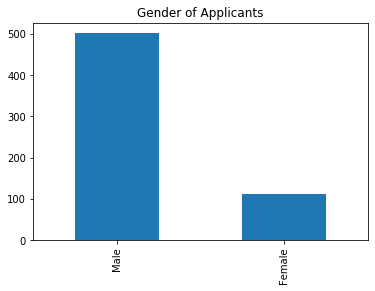

Yes    401
No     213
Name: Married, dtype: int64 

Yes    0.653094
No     0.346906
Name: Married, dtype: float64


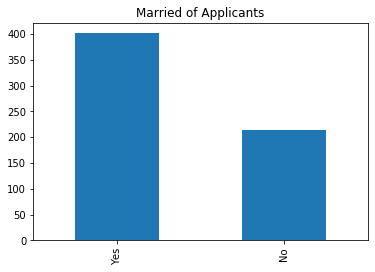

No     532
Yes     82
Name: Self_Employed, dtype: int64 

No     0.86645
Yes    0.13355
Name: Self_Employed, dtype: float64


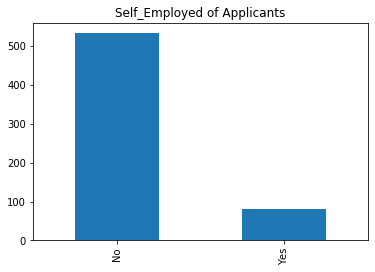

1.0    525
0.0     89
Name: Credit_History, dtype: int64 

1.0    0.855049
0.0    0.144951
Name: Credit_History, dtype: float64


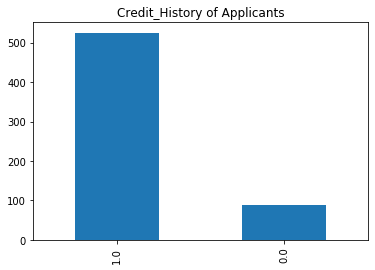

Y    422
N    192
Name: Loan_Status, dtype: int64 

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


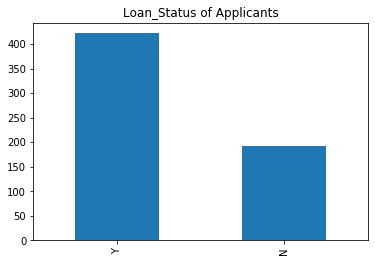

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#Categorical features 

list = ["Gender", "Married", "Self_Employed", "Credit_History", "Loan_Status"]

for i in range(len(list)): 
    category = train_data[list[i]].value_counts()
    category_percen = train_data[list[i]].value_counts(normalize = True)
    print(category, "\n")
    print(category_percen)
    category.plot.bar(title = list[i] + " of Applicants")
    plt.show()


# Categorical Features Observations: 

- about 81% of applicants are male 
- 65% of applicants are married 
- 14% of applicants are self-employed 
- 84% of applicants have a credit history of 1.0 
- 69% of applicants have an approved loan status 

# Ordinal Features 

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

0     0.586319
1     0.166124
2     0.164495
3+    0.083062
Name: Dependents, dtype: float64


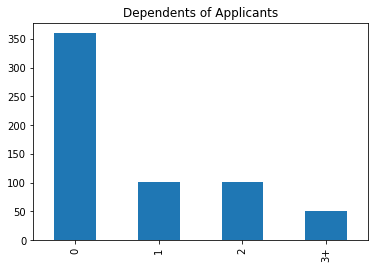

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64


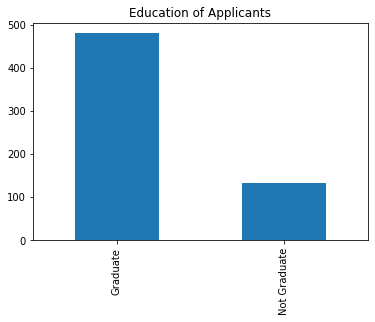

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64


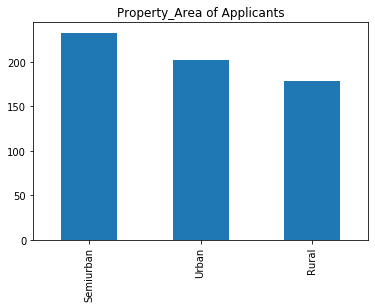

In [48]:


list2 = ["Dependents", "Education", "Property_Area"]


for i in range(len(list2)): 
    category = train_data[list2[i]].value_counts()
    category_percen = train_data[list2[i]].value_counts(normalize = True)
    print(category, "\n")
    print(category_percen)
    category.plot.bar(title = list2[i] + " of Applicants")
    plt.show()
    
    

# Ordinal Features Observations

- Most applicants have 0 dependents
- Most applicants are graduated 
- Most applicants live in semiurban areas

# Numerical Features Observations

Numerical features: These features have numerical values (ApplicantIncome, Co-applicantIncome, LoanAmount, Loan_Amount_Term)

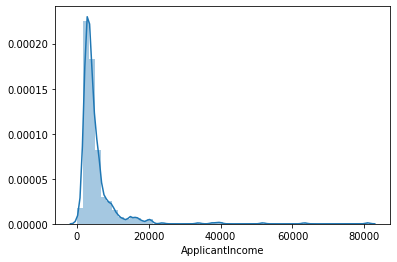

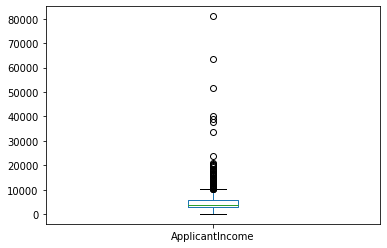

5403.459283387622


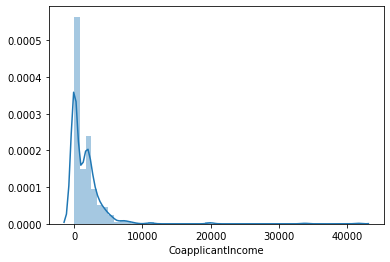

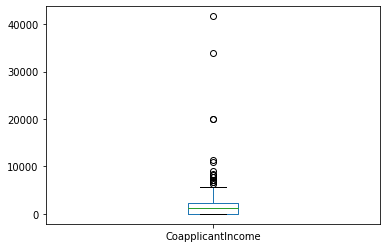

1621.245798027101


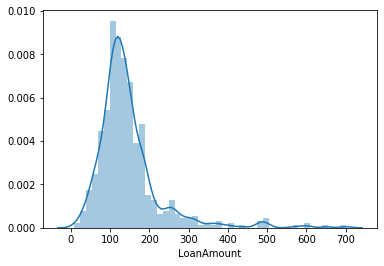

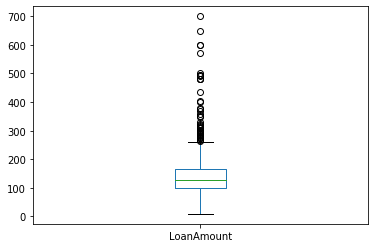

146.41216216216213


In [49]:


list = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]

for i in range(len(list)): 
    sns.distplot(train_data[list[i]])
    plt.show()
    train_data[list[i]].plot.box()
    plt.show()
    print(train_data[list[i]].mean())
   


# Hypotheses and Verification

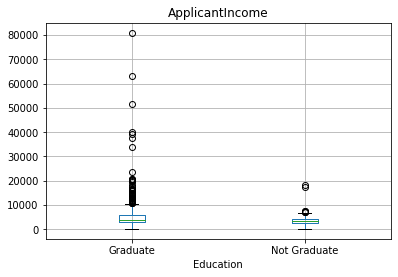

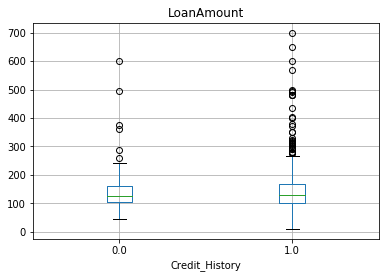

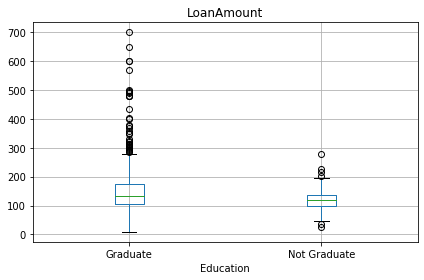

In [50]:
income_ed = train_data.boxplot(column = "ApplicantIncome", by = "Education")
plt.suptitle("")

income_ed = train_data.boxplot(column = "LoanAmount", by = "Credit_History")
plt.suptitle("")

income_ed = train_data.boxplot(column = "LoanAmount", by = "Education")
plt.suptitle("")

plt.tight_layout()
plt.show()

# Heat Map

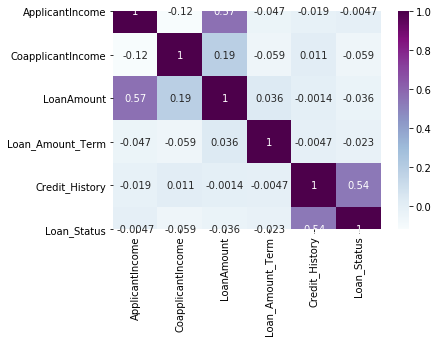

In [51]:
import numpy as np

train_c = train_data.copy() #Creating copy
train_c["Loan_Status"].replace("N", 0, inplace = True)
train_c["Loan_Status"].replace("Y", 1, inplace = True)

corr = train_c.corr()
sns.heatmap(corr, cmap = "BuPu", annot = True)



It can be seen through the heat map that there is a high correlation between Credit History and the target vairable Loan Status. 

# Outlier Treatment 

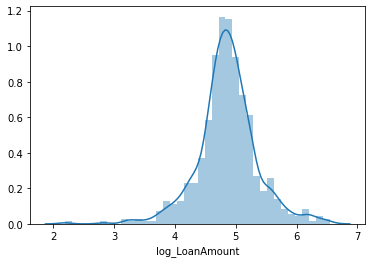

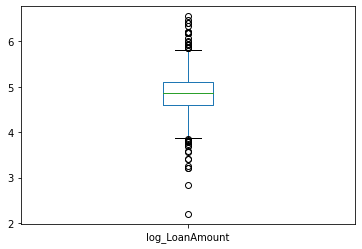

In [52]:
train_data["log_LoanAmount"] = np.log(train_data["LoanAmount"])
test_data["log_LoanAmount"] = np.log(test_data["LoanAmount"])

sns.distplot(train_data["log_LoanAmount"])
plt.show()
train_data["log_LoanAmount"].plot.box()
plt.show()


# Logistic Regression

In [53]:
train = train_c.drop("Loan_ID", axis = 1)
test = test_data.drop("Loan_ID",axis = 1)

X = train.drop("Loan_Status",1)
y = train.Loan_Status #target variable

#Fixing the yes/no to ones and zeroes 

X = pd.get_dummies(X)
train = pd.get_dummies(train_c)
test = pd.get_dummies(test_data)

X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.000000,180.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [68]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

X_train, x_v, y_train, y_v = train_test_split(X, y, test_size = 0.3, random_state =0)


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

reg = LogisticRegression()
reg.fit(X_train,y_train)

pred = reg.predict(x_v)
accurracy = accuracy_score(y_v, pred)
print(pred, "\n")
print("The prediction is accurrate to a percentage of: ",accurracy*100,"%")

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 

The prediction is accurrate to a percentage of:  83.24324324324324 %
